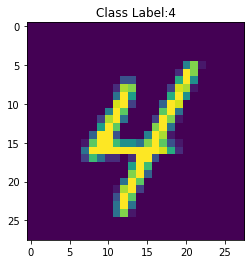

In [1]:
#7-(a)

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

#just to make all random sequences on all computers the same.
np.random.seed(1)

#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

#if you want to use only the first 1000 data points.
#images_train = images_train[0:1000,:]
#labels_train = labels_train[0:1000,:]


#show the 10'th train image
i=10
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()


The Average Accuracy when the number of training data is 30 : 0.5991398910212802
The Average Accuracy when the number of training data is 57 : 0.6589338890832972
The Average Accuracy when the number of training data is 109 : 0.7410463041355715
The Average Accuracy when the number of training data is 208 : 0.7785236556785721
The Average Accuracy when the number of training data is 396 : 0.8295003230991845
The Average Accuracy when the number of training data is 756 : 0.8574974966109691
The Average Accuracy when the number of training data is 1442 : 0.8790018846631618
The Average Accuracy when the number of training data is 2750 : 0.9141209113080462
The Average Accuracy when the number of training data is 5244 : 0.9383414925542295
The Average Accuracy when the number of training data is 10000 : 0.9526746561365492


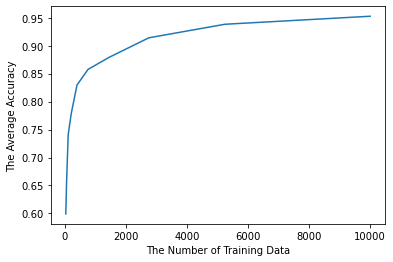

In [2]:
#7-(b), 7-(c)

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

def eu_distance(x,y):
    return np.linalg.norm(x-y)

def kNN_algo(images_train, labels_train, images_test, labels_test, k):
    distance = [eu_distance(images_train[i], images_test) for i in range(len(images_train))]
    idx = np.argpartition(distance, k)
    clas, freq = np.unique(labels_train[idx[:k]], return_counts=True)  
  
    return clas[np.argmax(freq)]


def kNN(images_train, labels_train, images_test, labels_test, k):
    accuracy=np.zeros(10)
    cnt=np.zeros(10)

    for x, lab in zip(images_test, labels_test):
        cnt[lab]+=1
        if kNN_algo(images_train, labels_train, x, labels_test, k) == lab :
            accuracy[lab]+=1

    acc=accuracy/cnt
    acc_av=np.sum(acc)/10
  
    return acc, acc_av


def main():
    #Loading the data
    M = loadmat('MNIST_digit_data.mat')
    images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

    #just to make all random sequences on all computers the same.
    np.random.seed(1)

    # randomly permute data points
    inds = np.random.permutation(images_train.shape[0])
    images_train = images_train[inds]
    labels_train = labels_train[inds]

    inds = np.random.permutation(images_test.shape[0])
    images_test = images_test[inds]
    labels_test = labels_test[inds]
    images_test = np.array(images_test[:1000,:])
    labels_test = np.array(labels_test[:1000,:])


    x_values = np.geomspace(30, 10000, num=10)
    x_values = x_values.astype(int)
    y_values = np.zeros(10)

    for m in range(len(x_values)):
        images_train_c = np.array(images_train[:x_values[m],:])
        labels_train_c = np.array(labels_train[:x_values[m],:])

        k=1
        [acc, acc_av] = kNN(images_train_c, labels_train_c, images_test, labels_test, k)  
        y_values[m]= acc_av
        
        print('The Average Accuracy when the number of training data is', x_values[m], ':', acc_av)
    
    
    plt.plot(x_values, y_values)
    plt.xlabel('The Number of Training Data')  
    plt.ylabel('The Average Accuracy')
    plt.show()


if __name__ == "__main__":
    main()


(I used only 1000 test data to speed it up)

For k=1, the more number of training data there is, the higher average accuracy we can get.

======= The number of training data: 30 =======
The Average Accuracy whith k= 1 : 0.5991398910212802
The Average Accuracy whith k= 2 : 0.5210075880303664
The Average Accuracy whith k= 3 : 0.47771830742185084
The Average Accuracy whith k= 5 : 0.4025224136716388
The Average Accuracy whith k= 10 : 0.27854480712190766
======= The number of training data: 57 =======
The Average Accuracy whith k= 1 : 0.6589338890832972
The Average Accuracy whith k= 2 : 0.5734889303879193
The Average Accuracy whith k= 3 : 0.5509978070911313
The Average Accuracy whith k= 5 : 0.5428747875237496
The Average Accuracy whith k= 10 : 0.39040853889411076
======= The number of training data: 109 =======
The Average Accuracy whith k= 1 : 0.7410463041355715
The Average Accuracy whith k= 2 : 0.6847946557127778
The Average Accuracy whith k= 3 : 0.6938610424564209
The Average Accuracy whith k= 5 : 0.6816840863866295
The Average Accuracy whith k= 10 : 0.651879907104033
======= The number of training data: 208 =======
The Av

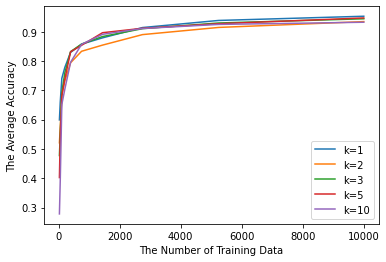

In [3]:
#7-(d)

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

def eu_distance(x,y):
    return np.linalg.norm(x-y)

def kNN_algo(images_train, labels_train, images_test, labels_test, k):
    distance = [eu_distance(images_train[i], images_test) for i in range(len(images_train))]
    idx = np.argpartition(distance, k)
    clas, freq = np.unique(labels_train[idx[:k]], return_counts=True)  
  
    return clas[np.argmax(freq)]


def kNN(images_train, labels_train, images_test, labels_test, k):
    accuracy=np.zeros(10)
    cnt=np.zeros(10)

    for x, lab in zip(images_test, labels_test):
        cnt[lab]+=1
        if kNN_algo(images_train, labels_train, x, labels_test, k) == lab :
            accuracy[lab]+=1

    acc=accuracy/cnt
    acc_av=np.sum(acc)/10
  
    return acc, acc_av


def main():
    #Loading the data
    #Loading the data
    M = loadmat('MNIST_digit_data.mat')
    images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

    #just to make all random sequences on all computers the same.
    np.random.seed(1)

    # randomly permute data points
    inds = np.random.permutation(images_train.shape[0])
    images_train = images_train[inds]
    labels_train = labels_train[inds]

    inds = np.random.permutation(images_test.shape[0])
    images_test = images_test[inds]
    labels_test = labels_test[inds]
    images_test = np.array(images_test[:1000,:])
    labels_test = np.array(labels_test[:1000,:])


    x_values = np.geomspace(30, 10000, num=10)
    x_values = x_values.astype(int)
    y_values = np.zeros((10,5))

    for m in range(len(x_values)):
        print('======= The number of training data:', x_values[m],'=======')
        images_train_c = np.array(images_train[:x_values[m],:])
        labels_train_c = np.array(labels_train[:x_values[m],:])

        k=[1, 2, 3, 5, 10]

        for i in range(len(k)):
            [acc, acc_av] = kNN(images_train_c, labels_train_c, images_test, labels_test, k[i])  
            y_values[m][i]= acc_av
            
            print('The Average Accuracy whith k=', k[i],':', acc_av)

    for i in range(y_values.shape[1]):
        plt.plot(x_values, y_values[:, i])
    
    plt.legend(('k=1','k=2','k=3','k=5','k=10'))
    plt.xlabel('The Number of Training Data')  
    plt.ylabel('The Average Accuracy')
    plt.show()


if __name__ == "__main__":
    main()


(I used only 1000 test data to speed it up)

The results depend on both the number of training data and k. However, in most of the cases, we can get the highest average accuracy with k=1 and the lowest average accuracy with k=2.

The Average Accuracy whith k= 1 : 0.8702867754080236
The Average Accuracy whith k= 2 : 0.8484587076531114
The Average Accuracy whith k= 3 : 0.8675834514559199
The Average Accuracy whith k= 5 : 0.8692622398797913
The Average Accuracy whith k= 10 : 0.8648350697551722


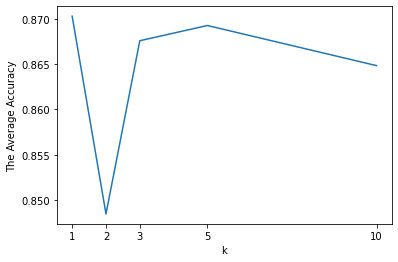

In [4]:
# 7-(e)

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

def eu_distance(x,y):
    return np.linalg.norm(x-y)

def kNN_algo(images_train, labels_train, images_test, labels_test, k):
    distance = [eu_distance(images_train[i], images_test) for i in range(len(images_train))]
    idx = np.argpartition(distance, k)
    clas, freq = np.unique(labels_train[idx[:k]], return_counts=True)  
  
    return clas[np.argmax(freq)]


def kNN(images_train, labels_train, images_test, labels_test, k):
    accuracy=np.zeros(10)
    cnt=np.zeros(10)

    for x, lab in zip(images_test, labels_test):
        cnt[lab]+=1
        if kNN_algo(images_train, labels_train, x, labels_test, k) == lab :
            accuracy[lab]+=1

    acc=accuracy/cnt
    acc_av=np.sum(acc)/10
  
    return acc, acc_av


def main():
    #Loading the data
    M = loadmat('MNIST_digit_data.mat')
    images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

    #just to make all random sequences on all computers the same.
    np.random.seed(1)

    # randomly permute data points
    inds = np.random.permutation(images_train.shape[0])
    images_train_e = images_train[inds]
    labels_train_e = labels_train[inds]

    est_images_train = np.array(images_train_e[:1000,:])
    est_labels_train = np.array(labels_train_e[:1000,:])
    est_images_test = np.array(images_train_e[1000:2000,:])
    est_labels_test = np.array(labels_train_e[1000:2000,:])

    k=[1, 2, 3, 5, 10]
    y_values=np.zeros(5)
    for i in range(len(k)):
        [acc, acc_av] = kNN(est_images_train, est_labels_train, est_images_test, est_labels_test, k[i])  
        y_values[i]= acc_av
        
        print('The Average Accuracy whith k=',k[i], ':', acc_av)

    plt.plot(k, y_values)
    plt.xticks(k)
    plt.xlabel('k')
    plt.ylabel('The Average Accuracy')
    plt.show()

    
    
    
if __name__ == '__main__':
    main()



The result shows that the best k is 1 when we extract 2000 data randomly from the training dataset and use the first 1000 for training and the other 1000 for testing.